In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

In [2]:

import keras
from torchsummary import summary
import os
import datasets
import pytorch_models,pytorch_experiment
import torch.optim as optim
import torch
use_cuda=torch.cuda.is_available()

dataset="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')





Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
filters={'mnist':16,'mnist_rot':32,'cifar10':64}


model = pytorch_models.AllConv(input_shape,num_classes,filters=filters[dataset])

parameters=pytorch_experiment.add_weight_decay(model.named_parameters(),1e-13)
optimizer = optim.Adam(parameters, lr=0.0001)

if use_cuda:
    model=model.cuda()
print(model)
#summary(model, input_size=[1,28,28])


AllConv(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvBNAct(
      (model): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (4): ConvBNAct(
      (model): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (5): ConvBNAct(
      (model): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (6): ConvBNAct(
      (mo

In [12]:

rotated_model=pytorch_models.AllConv(input_shape,num_classes,filters=filters[dataset])
if use_cuda:
    rotated_model= rotated_model.cuda()


rotated_parameters=pytorch_experiment.add_weight_decay(rotated_model.named_parameters(),1e-13)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.0001)

print(rotated_model)
#summary(model, input_size=[1,28,28])



AllConv(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvBNAct(
      (model): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (4): ConvBNAct(
      (model): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (5): ConvBNAct(
      (model): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (6): ConvBNAct(
      (mo

Training model with unrotated dataset...


Epoch 1: 100% (batch 196/196)  ==stats==> loss:   1.71, accuracy:  0.622, Time:  0:00:10


Test => Loss: 1.6309, Accuracy: 61.23% (6123/10000)


Epoch 2: 100% (batch 196/196)  ==stats==> loss:   0.97, accuracy:   0.67, Time:  0:00:10


Test => Loss: 0.8961, Accuracy: 68.25% (6825/10000)


Epoch 3: 100% (batch 196/196)  ==stats==> loss:  0.806, accuracy:  0.718, Time:  0:00:10


Test => Loss: 0.8819, Accuracy: 68.12% (6812/10000)


Epoch 4: 100% (batch 196/196)  ==stats==> loss:   0.77, accuracy:   0.73, Time:  0:00:10


Test => Loss: 0.9080, Accuracy: 67.55% (6755/10000)


Epoch 5: 100% (batch 196/196)  ==stats==> loss:  0.739, accuracy:  0.741, Time:  0:00:10


Test => Loss: 0.8288, Accuracy: 70.51% (7051/10000)


Epoch 6: 100% (batch 196/196)  ==stats==> loss:  0.713, accuracy:  0.748, Time:  0:00:10


Test => Loss: 0.8084, Accuracy: 71.28% (7128/10000)


Epoch 7: 100% (batch 196/196)  ==stats==> loss:  0.693, accuracy:  0.754, Time:  0:00:10


Test => Loss: 0.8288, Accuracy: 70.99% (7099/10000)


Epoch 8: 100% (batch 196/196)  ==stats==> loss:  0.677, accuracy:  0.761, Time:  0:00:10


Test => Loss: 0.8286, Accuracy: 71.29% (7129/10000)


Epoch 9: 100% (batch 196/196)  ==stats==> loss:  0.668, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.7384, Accuracy: 74.01% (7401/10000)


Epoch 10: 100% (batch 196/196)  ==stats==> loss:  0.648, accuracy:  0.773, Time:  0:00:10


Test => Loss: 0.7514, Accuracy: 73.73% (7373/10000)


Epoch 11: 100% (batch 196/196)  ==stats==> loss:   0.64, accuracy:  0.773, Time:  0:00:09


Test => Loss: 0.7434, Accuracy: 73.90% (7390/10000)


Epoch 12: 100% (batch 196/196)  ==stats==> loss:  0.627, accuracy:  0.778, Time:  0:00:09


Test => Loss: 0.7392, Accuracy: 74.23% (7423/10000)


Epoch 13: 100% (batch 196/196)  ==stats==> loss:  0.617, accuracy:  0.784, Time:  0:00:09


Test => Loss: 0.7097, Accuracy: 74.96% (7496/10000)


Epoch 14: 100% (batch 196/196)  ==stats==> loss:  0.602, accuracy:   0.79, Time:  0:00:09


Test => Loss: 0.7227, Accuracy: 74.71% (7471/10000)


Epoch 15: 100% (batch 196/196)  ==stats==> loss:  0.591, accuracy:  0.793, Time:  0:00:09


Test => Loss: 0.7301, Accuracy: 74.03% (7403/10000)


Epoch 16: 100% (batch 196/196)  ==stats==> loss:   0.58, accuracy:  0.796, Time:  0:00:09


Test => Loss: 0.7387, Accuracy: 74.58% (7458/10000)


Epoch 17: 100% (batch 196/196)  ==stats==> loss:  0.573, accuracy:  0.798, Time:  0:00:09


Test => Loss: 0.7157, Accuracy: 75.25% (7525/10000)


Epoch 18: 100% (batch 196/196)  ==stats==> loss:  0.564, accuracy:  0.801, Time:  0:00:09


Test => Loss: 0.7384, Accuracy: 74.82% (7482/10000)


Epoch 19: 100% (batch 196/196)  ==stats==> loss:  0.558, accuracy:  0.803, Time:  0:00:09


Test => Loss: 0.7191, Accuracy: 75.10% (7510/10000)


Epoch 20: 100% (batch 196/196)  ==stats==> loss:  0.554, accuracy:  0.806, Time:  0:00:09


Test => Loss: 0.7009, Accuracy: 75.85% (7585/10000)


Epoch 21: 100% (batch 196/196)  ==stats==> loss:  0.548, accuracy:  0.805, Time:  0:00:09


Test => Loss: 0.7358, Accuracy: 75.01% (7501/10000)


Epoch 22: 100% (batch 196/196)  ==stats==> loss:  0.535, accuracy:  0.813, Time:  0:00:09


Test => Loss: 0.6640, Accuracy: 77.17% (7717/10000)


Epoch 23: 100% (batch 196/196)  ==stats==> loss:  0.525, accuracy:  0.817, Time:  0:00:09


Test => Loss: 0.6803, Accuracy: 76.47% (7647/10000)


Epoch 24: 100% (batch 196/196)  ==stats==> loss:  0.513, accuracy:  0.818, Time:  0:00:09


Test => Loss: 0.7151, Accuracy: 75.86% (7586/10000)


Epoch 25: 100% (batch 196/196)  ==stats==> loss:  0.511, accuracy:  0.819, Time:  0:00:09


Test => Loss: 0.6837, Accuracy: 76.28% (7628/10000)


Epoch 26: 100% (batch 196/196)  ==stats==> loss:  0.503, accuracy:  0.822, Time:  0:00:09


Test => Loss: 0.6572, Accuracy: 77.56% (7756/10000)


Epoch 27: 100% (batch 196/196)  ==stats==> loss:   0.49, accuracy:  0.828, Time:  0:00:09


Test => Loss: 0.6863, Accuracy: 76.72% (7672/10000)


Epoch 28: 100% (batch 196/196)  ==stats==> loss:  0.488, accuracy:  0.829, Time:  0:00:09


Test => Loss: 0.6823, Accuracy: 76.60% (7660/10000)


Epoch 29: 100% (batch 196/196)  ==stats==> loss:   0.48, accuracy:  0.832, Time:  0:00:09


Test => Loss: 0.7376, Accuracy: 75.07% (7507/10000)


Epoch 30: 100% (batch 196/196)  ==stats==> loss:  0.472, accuracy:  0.833, Time:  0:00:09


Test => Loss: 0.6957, Accuracy: 76.89% (7689/10000)


Epoch 31: 100% (batch 196/196)  ==stats==> loss:  0.464, accuracy:  0.838, Time:  0:00:09


Test => Loss: 0.6640, Accuracy: 77.80% (7780/10000)


Epoch 32: 100% (batch 196/196)  ==stats==> loss:   0.46, accuracy:  0.839, Time:  0:00:09


Test => Loss: 0.6777, Accuracy: 77.06% (7706/10000)


Epoch 33: 100% (batch 196/196)  ==stats==> loss:   0.44, accuracy:  0.845, Time:  0:00:09


Test => Loss: 0.6750, Accuracy: 77.36% (7736/10000)


Epoch 34: 100% (batch 196/196)  ==stats==> loss:   0.44, accuracy:  0.845, Time:  0:00:09


Test => Loss: 0.6642, Accuracy: 77.72% (7772/10000)


Epoch 35: 100% (batch 196/196)  ==stats==> loss:  0.428, accuracy:   0.85, Time:  0:00:09


Test => Loss: 0.6452, Accuracy: 78.35% (7835/10000)


Epoch 36: 100% (batch 196/196)  ==stats==> loss:   0.42, accuracy:  0.852, Time:  0:00:09


Test => Loss: 0.6450, Accuracy: 78.54% (7854/10000)


Epoch 37: 100% (batch 196/196)  ==stats==> loss:  0.417, accuracy:  0.852, Time:  0:00:09


Test => Loss: 0.7117, Accuracy: 76.76% (7676/10000)


Epoch 38: 100% (batch 196/196)  ==stats==> loss:  0.408, accuracy:  0.857, Time:  0:00:09


Test => Loss: 0.6799, Accuracy: 77.46% (7746/10000)


Epoch 39: 100% (batch 196/196)  ==stats==> loss:  0.411, accuracy:  0.857, Time:  0:00:09


Test => Loss: 0.7005, Accuracy: 76.26% (7626/10000)


Epoch 40: 100% (batch 196/196)  ==stats==> loss:  0.394, accuracy:  0.861, Time:  0:00:09


Test => Loss: 0.6259, Accuracy: 79.39% (7939/10000)


Epoch 41: 100% (batch 196/196)  ==stats==> loss:  0.382, accuracy:  0.867, Time:  0:00:09


Test => Loss: 0.6537, Accuracy: 78.76% (7876/10000)


Epoch 42: 100% (batch 196/196)  ==stats==> loss:  0.379, accuracy:  0.866, Time:  0:00:09


Test => Loss: 0.6663, Accuracy: 78.17% (7817/10000)


Epoch 43: 100% (batch 196/196)  ==stats==> loss:  0.381, accuracy:  0.864, Time:  0:00:09


Test => Loss: 0.6863, Accuracy: 77.90% (7790/10000)


Epoch 44: 100% (batch 196/196)  ==stats==> loss:   0.37, accuracy:   0.87, Time:  0:00:09


Test => Loss: 0.6978, Accuracy: 76.74% (7674/10000)


Epoch 45: 100% (batch 196/196)  ==stats==> loss:  0.356, accuracy:  0.874, Time:  0:00:09


Test => Loss: 0.6989, Accuracy: 78.09% (7809/10000)


Epoch 46: 100% (batch 196/196)  ==stats==> loss:  0.355, accuracy:  0.876, Time:  0:00:09


Test => Loss: 0.6690, Accuracy: 78.35% (7835/10000)


Epoch 47: 100% (batch 196/196)  ==stats==> loss:   0.35, accuracy:  0.879, Time:  0:00:09


Test => Loss: 0.6605, Accuracy: 78.66% (7866/10000)


Epoch 48: 100% (batch 196/196)  ==stats==> loss:  0.336, accuracy:  0.883, Time:  0:00:09


Test => Loss: 0.7024, Accuracy: 77.39% (7739/10000)


Epoch 49: 100% (batch 196/196)  ==stats==> loss:  0.322, accuracy:  0.889, Time:  0:00:09


Test => Loss: 0.6865, Accuracy: 79.00% (7900/10000)


Epoch 50: 100% (batch 196/196)  ==stats==> loss:  0.315, accuracy:  0.889, Time:  0:00:09


Test => Loss: 0.7269, Accuracy: 77.23% (7723/10000)


Epoch 51: 100% (batch 196/196)  ==stats==> loss:  0.324, accuracy:  0.884, Time:  0:00:09


Test => Loss: 0.6773, Accuracy: 79.05% (7905/10000)


Epoch 52: 100% (batch 196/196)  ==stats==> loss:   0.31, accuracy:  0.891, Time:  0:00:09


Test => Loss: 0.6573, Accuracy: 79.39% (7939/10000)


Epoch 53: 100% (batch 196/196)  ==stats==> loss:  0.307, accuracy:  0.892, Time:  0:00:09


Test => Loss: 0.6821, Accuracy: 78.65% (7865/10000)


Epoch 54: 100% (batch 196/196)  ==stats==> loss:  0.293, accuracy:  0.898, Time:  0:00:09


Test => Loss: 0.7660, Accuracy: 77.08% (7708/10000)


Epoch 55: 100% (batch 196/196)  ==stats==> loss:  0.289, accuracy:  0.899, Time:  0:00:09


Test => Loss: 0.6754, Accuracy: 78.91% (7891/10000)


Epoch 56: 100% (batch 196/196)  ==stats==> loss:   0.28, accuracy:  0.902, Time:  0:00:09


Test => Loss: 0.6707, Accuracy: 78.84% (7884/10000)


Epoch 57: 100% (batch 196/196)  ==stats==> loss:  0.277, accuracy:  0.904, Time:  0:00:09


Test => Loss: 0.7830, Accuracy: 76.85% (7685/10000)


Epoch 58: 100% (batch 196/196)  ==stats==> loss:  0.274, accuracy:  0.904, Time:  0:00:09


Test => Loss: 0.8296, Accuracy: 75.97% (7597/10000)


Epoch 59: 100% (batch 196/196)  ==stats==> loss:  0.261, accuracy:  0.909, Time:  0:00:09


Test => Loss: 0.7390, Accuracy: 77.82% (7782/10000)


Epoch 60: 100% (batch 196/196)  ==stats==> loss:  0.254, accuracy:  0.912, Time:  0:00:09


Test => Loss: 0.7405, Accuracy: 78.32% (7832/10000)


Epoch 61: 100% (batch 196/196)  ==stats==> loss:  0.248, accuracy:  0.913, Time:  0:00:09


Test => Loss: 0.7013, Accuracy: 79.54% (7954/10000)


Epoch 62: 100% (batch 196/196)  ==stats==> loss:  0.241, accuracy:  0.917, Time:  0:00:09


Test => Loss: 0.7419, Accuracy: 77.87% (7787/10000)


Epoch 63: 100% (batch 196/196)  ==stats==> loss:  0.241, accuracy:  0.916, Time:  0:00:09


Test => Loss: 0.7858, Accuracy: 77.56% (7756/10000)


Epoch 64: 100% (batch 196/196)  ==stats==> loss:  0.234, accuracy:  0.918, Time:  0:00:09


Test => Loss: 0.7513, Accuracy: 78.67% (7867/10000)


Epoch 65: 100% (batch 196/196)  ==stats==> loss:  0.216, accuracy:  0.926, Time:  0:00:09


Test => Loss: 0.7499, Accuracy: 79.21% (7921/10000)


Epoch 66: 100% (batch 196/196)  ==stats==> loss:  0.234, accuracy:  0.917, Time:  0:00:09


Test => Loss: 0.7385, Accuracy: 78.87% (7887/10000)


Epoch 67: 100% (batch 196/196)  ==stats==> loss:  0.206, accuracy:   0.93, Time:  0:00:09


Test => Loss: 0.7263, Accuracy: 79.38% (7938/10000)


Epoch 68: 100% (batch 196/196)  ==stats==> loss:  0.203, accuracy:   0.93, Time:  0:00:09


Test => Loss: 0.7869, Accuracy: 79.05% (7905/10000)


Epoch 69: 100% (batch 196/196)  ==stats==> loss:  0.192, accuracy:  0.934, Time:  0:00:09


Test => Loss: 0.7486, Accuracy: 79.16% (7916/10000)


Epoch 70: 100% (batch 196/196)  ==stats==> loss:  0.191, accuracy:  0.935, Time:  0:00:09


Test => Loss: 0.7813, Accuracy: 79.07% (7907/10000)


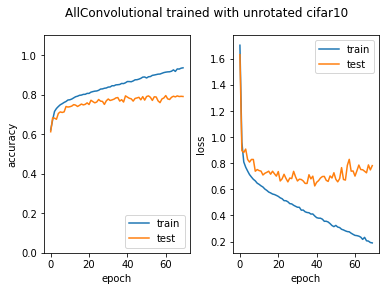

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 196/196)  ==stats==> loss:   1.82, accuracy:  0.522, Time:  0:00:10


Test => Loss: 1.7302, Accuracy: 53.38% (5338/10000)


Epoch 2: 100% (batch 196/196)  ==stats==> loss:   1.29, accuracy:  0.562, Time:  0:00:09


Test => Loss: 1.1825, Accuracy: 58.87% (5887/10000)


Epoch 3: 100% (batch 196/196)  ==stats==> loss:   1.11, accuracy:  0.614, Time:  0:00:09


Test => Loss: 1.0690, Accuracy: 62.65% (6265/10000)


Epoch 4: 100% (batch 196/196)  ==stats==> loss:   1.04, accuracy:  0.634, Time:  0:00:10


Test => Loss: 1.1071, Accuracy: 59.73% (5973/10000)


Epoch 5: 100% (batch 196/196)  ==stats==> loss:  0.993, accuracy:   0.65, Time:  0:00:09


Test => Loss: 0.9958, Accuracy: 65.09% (6509/10000)


Epoch 6: 100% (batch 196/196)  ==stats==> loss:   0.96, accuracy:  0.663, Time:  0:00:10


Test => Loss: 0.9908, Accuracy: 64.87% (6487/10000)


Epoch 7: 100% (batch 196/196)  ==stats==> loss:  0.934, accuracy:  0.672, Time:  0:00:09


Test => Loss: 0.9840, Accuracy: 65.50% (6550/10000)


Epoch 8: 100% (batch 196/196)  ==stats==> loss:  0.921, accuracy:  0.679, Time:  0:00:10


Test => Loss: 0.9939, Accuracy: 64.55% (6455/10000)


Epoch 9: 100% (batch 196/196)  ==stats==> loss:  0.907, accuracy:  0.684, Time:  0:00:09


Test => Loss: 0.9501, Accuracy: 67.13% (6713/10000)


Epoch 10: 100% (batch 196/196)  ==stats==> loss:  0.889, accuracy:  0.687, Time:  0:00:09


Test => Loss: 0.9293, Accuracy: 67.63% (6763/10000)


Epoch 11: 100% (batch 196/196)  ==stats==> loss:  0.877, accuracy:  0.695, Time:  0:00:09


Test => Loss: 0.9999, Accuracy: 64.85% (6485/10000)


Epoch 12: 100% (batch 196/196)  ==stats==> loss:  0.868, accuracy:  0.696, Time:  0:00:09


Test => Loss: 0.9283, Accuracy: 67.20% (6720/10000)


Epoch 13: 100% (batch 196/196)  ==stats==> loss:  0.855, accuracy:  0.701, Time:  0:00:09


Test => Loss: 0.9230, Accuracy: 67.74% (6774/10000)


Epoch 14: 100% (batch 196/196)  ==stats==> loss:  0.849, accuracy:  0.703, Time:  0:00:09


Test => Loss: 0.9057, Accuracy: 68.27% (6827/10000)


Epoch 15: 100% (batch 196/196)  ==stats==> loss:  0.835, accuracy:  0.706, Time:  0:00:09


Test => Loss: 0.8869, Accuracy: 68.88% (6888/10000)


Epoch 16: 100% (batch 196/196)  ==stats==> loss:  0.833, accuracy:  0.707, Time:  0:00:09


Test => Loss: 0.9251, Accuracy: 67.75% (6775/10000)


Epoch 17: 100% (batch 196/196)  ==stats==> loss:  0.826, accuracy:  0.711, Time:  0:00:09


Test => Loss: 0.9116, Accuracy: 68.14% (6814/10000)


Epoch 18: 100% (batch 196/196)  ==stats==> loss:  0.821, accuracy:  0.712, Time:  0:00:09


Test => Loss: 0.9167, Accuracy: 67.94% (6794/10000)


Epoch 19: 100% (batch 196/196)  ==stats==> loss:  0.811, accuracy:  0.718, Time:  0:00:09


Test => Loss: 0.9146, Accuracy: 67.49% (6749/10000)


Epoch 20: 100% (batch 196/196)  ==stats==> loss:  0.812, accuracy:  0.715, Time:  0:00:09


Test => Loss: 0.8880, Accuracy: 68.77% (6877/10000)


Epoch 21: 100% (batch 196/196)  ==stats==> loss:  0.801, accuracy:  0.718, Time:  0:00:09


Test => Loss: 0.8810, Accuracy: 69.40% (6940/10000)


Epoch 22: 100% (batch 196/196)  ==stats==> loss:  0.798, accuracy:  0.723, Time:  0:00:09


Test => Loss: 0.8884, Accuracy: 68.88% (6888/10000)


Epoch 23: 100% (batch 196/196)  ==stats==> loss:  0.798, accuracy:  0.721, Time:  0:00:09


Test => Loss: 0.8796, Accuracy: 69.50% (6950/10000)


Epoch 24: 100% (batch 196/196)  ==stats==> loss:  0.786, accuracy:  0.725, Time:  0:00:09


Test => Loss: 0.8707, Accuracy: 70.18% (7018/10000)


Epoch 25: 100% (batch 196/196)  ==stats==> loss:  0.786, accuracy:  0.723, Time:  0:00:09


Test => Loss: 0.8687, Accuracy: 69.68% (6968/10000)


Epoch 26: 100% (batch 196/196)  ==stats==> loss:  0.774, accuracy:  0.731, Time:  0:00:09


Test => Loss: 0.8903, Accuracy: 69.24% (6924/10000)


Epoch 27: 100% (batch 196/196)  ==stats==> loss:  0.778, accuracy:  0.727, Time:  0:00:09


Test => Loss: 0.8775, Accuracy: 69.63% (6963/10000)


Epoch 28: 100% (batch 196/196)  ==stats==> loss:  0.774, accuracy:  0.729, Time:  0:00:09


Test => Loss: 0.8607, Accuracy: 69.92% (6992/10000)


Epoch 29: 100% (batch 196/196)  ==stats==> loss:  0.772, accuracy:   0.73, Time:  0:00:09


Test => Loss: 0.8716, Accuracy: 69.77% (6977/10000)


Epoch 30: 100% (batch 196/196)  ==stats==> loss:  0.768, accuracy:  0.731, Time:  0:00:09


Test => Loss: 0.8540, Accuracy: 70.08% (7008/10000)


Epoch 31: 100% (batch 196/196)  ==stats==> loss:  0.762, accuracy:  0.733, Time:  0:00:09


Test => Loss: 0.8415, Accuracy: 70.84% (7084/10000)


Epoch 32: 100% (batch 196/196)  ==stats==> loss:  0.754, accuracy:  0.734, Time:  0:00:09


Test => Loss: 0.8485, Accuracy: 69.98% (6998/10000)


Epoch 33: 100% (batch 196/196)  ==stats==> loss:  0.751, accuracy:  0.736, Time:  0:00:09


Test => Loss: 0.8393, Accuracy: 70.99% (7099/10000)


Epoch 34: 100% (batch 196/196)  ==stats==> loss:  0.751, accuracy:  0.735, Time:  0:00:09


Test => Loss: 0.8496, Accuracy: 70.20% (7020/10000)


Epoch 35: 100% (batch 196/196)  ==stats==> loss:  0.744, accuracy:  0.739, Time:  0:00:09


Test => Loss: 0.8467, Accuracy: 70.25% (7025/10000)


Epoch 36: 100% (batch 196/196)  ==stats==> loss:  0.744, accuracy:  0.739, Time:  0:00:09


Test => Loss: 0.8394, Accuracy: 70.58% (7058/10000)


Epoch 37: 100% (batch 196/196)  ==stats==> loss:  0.745, accuracy:   0.74, Time:  0:00:09


Test => Loss: 0.8518, Accuracy: 70.37% (7037/10000)


Epoch 38: 100% (batch 196/196)  ==stats==> loss:  0.739, accuracy:  0.743, Time:  0:00:10


Test => Loss: 0.8652, Accuracy: 70.12% (7012/10000)


Epoch 39: 100% (batch 196/196)  ==stats==> loss:  0.733, accuracy:  0.746, Time:  0:00:09


Test => Loss: 0.8176, Accuracy: 71.94% (7194/10000)


Epoch 40: 100% (batch 196/196)  ==stats==> loss:  0.734, accuracy:  0.744, Time:  0:00:09


Test => Loss: 0.8324, Accuracy: 70.81% (7081/10000)


Epoch 41: 100% (batch 196/196)  ==stats==> loss:  0.731, accuracy:  0.744, Time:  0:00:09


Test => Loss: 0.8523, Accuracy: 70.58% (7058/10000)


Epoch 42: 100% (batch 196/196)  ==stats==> loss:  0.727, accuracy:  0.746, Time:  0:00:09


Test => Loss: 0.8378, Accuracy: 70.83% (7083/10000)


Epoch 43: 100% (batch 196/196)  ==stats==> loss:   0.72, accuracy:  0.747, Time:  0:00:09


Test => Loss: 0.8243, Accuracy: 71.49% (7149/10000)


Epoch 44: 100% (batch 196/196)  ==stats==> loss:  0.723, accuracy:  0.747, Time:  0:00:09


Test => Loss: 0.8407, Accuracy: 71.06% (7106/10000)


Epoch 45: 100% (batch 196/196)  ==stats==> loss:  0.725, accuracy:  0.747, Time:  0:00:09


Test => Loss: 0.8597, Accuracy: 70.30% (7030/10000)


Epoch 46: 100% (batch 196/196)  ==stats==> loss:  0.721, accuracy:  0.748, Time:  0:00:09


Test => Loss: 0.8202, Accuracy: 71.90% (7190/10000)


Epoch 47: 100% (batch 196/196)  ==stats==> loss:  0.712, accuracy:  0.751, Time:  0:00:09


Test => Loss: 0.8032, Accuracy: 72.56% (7256/10000)


Epoch 48: 100% (batch 196/196)  ==stats==> loss:  0.716, accuracy:  0.749, Time:  0:00:09


Test => Loss: 0.8136, Accuracy: 71.46% (7146/10000)


Epoch 49: 100% (batch 196/196)  ==stats==> loss:  0.706, accuracy:  0.753, Time:  0:00:09


Test => Loss: 0.8265, Accuracy: 71.38% (7138/10000)


Epoch 50: 100% (batch 196/196)  ==stats==> loss:  0.716, accuracy:   0.75, Time:  0:00:10


Test => Loss: 0.8128, Accuracy: 72.08% (7208/10000)


Epoch 51: 100% (batch 196/196)  ==stats==> loss:  0.703, accuracy:  0.754, Time:  0:00:09


Test => Loss: 0.8189, Accuracy: 71.99% (7199/10000)


Epoch 52: 100% (batch 196/196)  ==stats==> loss:  0.709, accuracy:  0.752, Time:  0:00:09


Test => Loss: 0.8283, Accuracy: 71.07% (7107/10000)


Epoch 53: 100% (batch 196/196)  ==stats==> loss:    0.7, accuracy:  0.757, Time:  0:00:09


Test => Loss: 0.8210, Accuracy: 71.16% (7116/10000)


Epoch 54: 100% (batch 196/196)  ==stats==> loss:  0.695, accuracy:  0.757, Time:  0:00:09


Test => Loss: 0.8318, Accuracy: 71.19% (7119/10000)


Epoch 55: 100% (batch 196/196)  ==stats==> loss:  0.697, accuracy:  0.757, Time:  0:00:09


Test => Loss: 0.7949, Accuracy: 72.33% (7233/10000)


Epoch 56: 100% (batch 196/196)  ==stats==> loss:  0.696, accuracy:  0.755, Time:  0:00:09


Test => Loss: 0.8301, Accuracy: 71.08% (7108/10000)


Epoch 57: 100% (batch 196/196)  ==stats==> loss:  0.695, accuracy:  0.757, Time:  0:00:09


Test => Loss: 0.7914, Accuracy: 72.50% (7250/10000)


Epoch 58: 100% (batch 196/196)  ==stats==> loss:  0.688, accuracy:  0.759, Time:  0:00:09


Test => Loss: 0.8536, Accuracy: 70.41% (7041/10000)


Epoch 59: 100% (batch 196/196)  ==stats==> loss:  0.686, accuracy:  0.761, Time:  0:00:09


Test => Loss: 0.8200, Accuracy: 71.81% (7181/10000)


Epoch 60: 100% (batch 196/196)  ==stats==> loss:   0.69, accuracy:  0.758, Time:  0:00:09


Test => Loss: 0.8380, Accuracy: 71.62% (7162/10000)


Epoch 61: 100% (batch 196/196)  ==stats==> loss:  0.682, accuracy:  0.762, Time:  0:00:09


Test => Loss: 0.8018, Accuracy: 72.23% (7223/10000)


Epoch 62: 100% (batch 196/196)  ==stats==> loss:  0.691, accuracy:  0.757, Time:  0:00:09


Test => Loss: 0.8076, Accuracy: 72.06% (7206/10000)


Epoch 63: 100% (batch 196/196)  ==stats==> loss:  0.681, accuracy:  0.761, Time:  0:00:09


Test => Loss: 0.7924, Accuracy: 72.57% (7257/10000)


Epoch 64: 100% (batch 196/196)  ==stats==> loss:  0.684, accuracy:  0.759, Time:  0:00:09


Test => Loss: 0.8122, Accuracy: 71.62% (7162/10000)


Epoch 65: 100% (batch 196/196)  ==stats==> loss:   0.67, accuracy:  0.765, Time:  0:00:09


Test => Loss: 0.8582, Accuracy: 70.80% (7080/10000)


Epoch 66: 100% (batch 196/196)  ==stats==> loss:  0.681, accuracy:   0.76, Time:  0:00:09


Test => Loss: 0.7973, Accuracy: 73.04% (7304/10000)


Epoch 67: 100% (batch 196/196)  ==stats==> loss:   0.67, accuracy:  0.766, Time:  0:00:09


Test => Loss: 0.8110, Accuracy: 71.80% (7180/10000)


Epoch 68: 100% (batch 196/196)  ==stats==> loss:  0.673, accuracy:  0.766, Time:  0:00:09


Test => Loss: 0.7878, Accuracy: 72.78% (7278/10000)


Epoch 69: 100% (batch 196/196)  ==stats==> loss:  0.668, accuracy:  0.766, Time:  0:00:09


Test => Loss: 0.7933, Accuracy: 73.12% (7312/10000)


Epoch 70: 100% (batch 196/196)  ==stats==> loss:  0.669, accuracy:  0.766, Time:  0:00:09


Test => Loss: 0.8086, Accuracy: 72.01% (7201/10000)


Epoch 71: 100% (batch 196/196)  ==stats==> loss:  0.672, accuracy:  0.762, Time:  0:00:09


Test => Loss: 0.7784, Accuracy: 73.06% (7306/10000)


Epoch 72: 100% (batch 196/196)  ==stats==> loss:  0.668, accuracy:  0.766, Time:  0:00:09


Test => Loss: 0.8051, Accuracy: 72.29% (7229/10000)


Epoch 73: 100% (batch 196/196)  ==stats==> loss:  0.661, accuracy:  0.767, Time:  0:00:09


Test => Loss: 0.8053, Accuracy: 72.40% (7240/10000)


Epoch 74: 100% (batch 196/196)  ==stats==> loss:  0.659, accuracy:  0.768, Time:  0:00:09


Test => Loss: 0.7922, Accuracy: 72.68% (7268/10000)


Epoch 75: 100% (batch 196/196)  ==stats==> loss:  0.655, accuracy:  0.771, Time:  0:00:09


Test => Loss: 0.8204, Accuracy: 71.37% (7137/10000)


Epoch 76: 100% (batch 196/196)  ==stats==> loss:  0.659, accuracy:  0.769, Time:  0:00:09


Test => Loss: 0.8001, Accuracy: 72.54% (7254/10000)


Epoch 77: 100% (batch 196/196)  ==stats==> loss:  0.658, accuracy:   0.77, Time:  0:00:09


Test => Loss: 0.7911, Accuracy: 72.71% (7271/10000)


Epoch 78: 100% (batch 196/196)  ==stats==> loss:  0.653, accuracy:   0.77, Time:  0:00:09


Test => Loss: 0.8120, Accuracy: 72.22% (7222/10000)


Epoch 79: 100% (batch 196/196)  ==stats==> loss:  0.653, accuracy:  0.772, Time:  0:00:09


Test => Loss: 0.8093, Accuracy: 72.49% (7249/10000)


Epoch 80: 100% (batch 196/196)  ==stats==> loss:  0.651, accuracy:  0.772, Time:  0:00:10


Test => Loss: 0.7896, Accuracy: 72.86% (7286/10000)


Epoch 81: 100% (batch 196/196)  ==stats==> loss:  0.651, accuracy:   0.77, Time:  0:00:15


Test => Loss: 0.8194, Accuracy: 72.08% (7208/10000)


Epoch 82: 100% (batch 196/196)  ==stats==> loss:  0.644, accuracy:  0.775, Time:  0:00:15


Test => Loss: 0.7865, Accuracy: 72.85% (7285/10000)


Epoch 83: 100% (batch 196/196)  ==stats==> loss:  0.642, accuracy:  0.776, Time:  0:00:15


Test => Loss: 0.8057, Accuracy: 71.79% (7179/10000)


Epoch 84: 100% (batch 196/196)  ==stats==> loss:  0.649, accuracy:  0.772, Time:  0:00:16


Test => Loss: 0.7904, Accuracy: 72.78% (7278/10000)


Epoch 85: 100% (batch 196/196)  ==stats==> loss:  0.644, accuracy:  0.774, Time:  0:00:15


Test => Loss: 0.7813, Accuracy: 72.91% (7291/10000)


Epoch 86: 100% (batch 196/196)  ==stats==> loss:  0.639, accuracy:  0.778, Time:  0:00:16


Test => Loss: 0.7869, Accuracy: 72.85% (7285/10000)


Epoch 87: 100% (batch 196/196)  ==stats==> loss:  0.648, accuracy:  0.773, Time:  0:00:15


Test => Loss: 0.7769, Accuracy: 72.98% (7298/10000)


Epoch 88: 100% (batch 196/196)  ==stats==> loss:  0.634, accuracy:  0.777, Time:  0:00:15


Test => Loss: 0.7686, Accuracy: 73.69% (7369/10000)


Epoch 89: 100% (batch 196/196)  ==stats==> loss:  0.634, accuracy:  0.779, Time:  0:00:16


Test => Loss: 0.7924, Accuracy: 72.79% (7279/10000)


Epoch 90: 100% (batch 196/196)  ==stats==> loss:   0.63, accuracy:  0.777, Time:  0:00:15


Test => Loss: 0.7818, Accuracy: 73.43% (7343/10000)


Epoch 91: 100% (batch 196/196)  ==stats==> loss:  0.631, accuracy:  0.778, Time:  0:00:16


Test => Loss: 0.7748, Accuracy: 72.98% (7298/10000)


Epoch 92: 100% (batch 196/196)  ==stats==> loss:  0.631, accuracy:  0.778, Time:  0:00:15


Test => Loss: 0.8051, Accuracy: 71.97% (7197/10000)


Epoch 93: 100% (batch 196/196)  ==stats==> loss:   0.63, accuracy:  0.778, Time:  0:00:15


Test => Loss: 0.7969, Accuracy: 72.70% (7270/10000)


Epoch 94: 100% (batch 196/196)  ==stats==> loss:  0.629, accuracy:  0.778, Time:  0:00:16


Test => Loss: 0.7768, Accuracy: 73.66% (7366/10000)


Epoch 95: 100% (batch 196/196)  ==stats==> loss:  0.623, accuracy:  0.781, Time:  0:00:16


Test => Loss: 0.7539, Accuracy: 73.77% (7377/10000)


Epoch 96: 100% (batch 196/196)  ==stats==> loss:  0.623, accuracy:  0.781, Time:  0:00:16


Test => Loss: 0.7740, Accuracy: 73.72% (7372/10000)


Epoch 97: 100% (batch 196/196)  ==stats==> loss:  0.619, accuracy:  0.784, Time:  0:00:16


Test => Loss: 0.7814, Accuracy: 73.04% (7304/10000)


Epoch 98: 100% (batch 196/196)  ==stats==> loss:  0.619, accuracy:  0.784, Time:  0:00:15


Test => Loss: 0.7911, Accuracy: 73.13% (7313/10000)


Epoch 99: 100% (batch 196/196)  ==stats==> loss:   0.62, accuracy:  0.781, Time:  0:00:16


Test => Loss: 0.7902, Accuracy: 73.38% (7338/10000)


Epoch 100: 100% (batch 196/196)  ==stats==> loss:  0.626, accuracy:  0.782, Time:  0:00:16


Test => Loss: 0.7853, Accuracy: 72.61% (7261/10000)


Epoch 101: 100% (batch 196/196)  ==stats==> loss:  0.612, accuracy:  0.785, Time:  0:00:15


Test => Loss: 0.7566, Accuracy: 73.65% (7365/10000)


Epoch 102: 100% (batch 196/196)  ==stats==> loss:  0.617, accuracy:  0.784, Time:  0:00:16


Test => Loss: 0.7782, Accuracy: 73.32% (7332/10000)


Epoch 103: 100% (batch 196/196)  ==stats==> loss:  0.616, accuracy:  0.784, Time:  0:00:16


Test => Loss: 0.8050, Accuracy: 72.30% (7230/10000)


Epoch 104: 100% (batch 196/196)  ==stats==> loss:  0.614, accuracy:  0.786, Time:  0:00:17


Test => Loss: 0.7895, Accuracy: 73.06% (7306/10000)


Epoch 105: 100% (batch 196/196)  ==stats==> loss:  0.609, accuracy:  0.787, Time:  0:00:17


Test => Loss: 0.7575, Accuracy: 74.08% (7408/10000)


Epoch 106: 100% (batch 196/196)  ==stats==> loss:  0.613, accuracy:  0.787, Time:  0:00:15


Test => Loss: 0.7680, Accuracy: 73.34% (7334/10000)


Epoch 107: 100% (batch 196/196)  ==stats==> loss:  0.611, accuracy:  0.785, Time:  0:00:16


Test => Loss: 0.7701, Accuracy: 73.32% (7332/10000)


Epoch 108: 100% (batch 196/196)  ==stats==> loss:  0.604, accuracy:  0.788, Time:  0:00:16


Test => Loss: 0.7848, Accuracy: 73.53% (7353/10000)


Epoch 109: 100% (batch 196/196)  ==stats==> loss:    0.6, accuracy:  0.788, Time:  0:00:16


Test => Loss: 0.7796, Accuracy: 73.76% (7376/10000)


Epoch 110: 100% (batch 196/196)  ==stats==> loss:  0.603, accuracy:  0.788, Time:  0:00:16


Test => Loss: 0.7773, Accuracy: 73.47% (7347/10000)


Epoch 111: 100% (batch 196/196)  ==stats==> loss:  0.606, accuracy:  0.787, Time:  0:00:15


Test => Loss: 0.7803, Accuracy: 73.29% (7329/10000)


Epoch 112: 100% (batch 196/196)  ==stats==> loss:  0.599, accuracy:  0.789, Time:  0:00:16


Test => Loss: 0.7723, Accuracy: 74.07% (7407/10000)


Epoch 113: 100% (batch 196/196)  ==stats==> loss:  0.602, accuracy:  0.788, Time:  0:00:15


Test => Loss: 0.7820, Accuracy: 73.52% (7352/10000)


Epoch 114: 100% (batch 196/196)  ==stats==> loss:  0.597, accuracy:  0.792, Time:  0:00:16


Test => Loss: 0.7604, Accuracy: 73.84% (7384/10000)


Epoch 115: 100% (batch 196/196)  ==stats==> loss:  0.592, accuracy:  0.792, Time:  0:00:16


Test => Loss: 0.7908, Accuracy: 73.23% (7323/10000)


Epoch 116: 100% (batch 196/196)  ==stats==> loss:  0.593, accuracy:  0.794, Time:  0:00:16


Test => Loss: 0.7644, Accuracy: 73.92% (7392/10000)


Epoch 117: 100% (batch 196/196)  ==stats==> loss:  0.596, accuracy:   0.79, Time:  0:00:16


Test => Loss: 0.7709, Accuracy: 73.72% (7372/10000)


Epoch 118: 100% (batch 196/196)  ==stats==> loss:   0.59, accuracy:  0.792, Time:  0:00:16


Test => Loss: 0.7693, Accuracy: 73.72% (7372/10000)


Epoch 119: 100% (batch 196/196)  ==stats==> loss:  0.589, accuracy:  0.793, Time:  0:00:15


Test => Loss: 0.7818, Accuracy: 74.29% (7429/10000)


Epoch 120: 100% (batch 196/196)  ==stats==> loss:  0.587, accuracy:  0.795, Time:  0:00:17


Test => Loss: 0.7563, Accuracy: 74.15% (7415/10000)


Epoch 121: 100% (batch 196/196)  ==stats==> loss:  0.577, accuracy:  0.798, Time:  0:00:16


Test => Loss: 0.7711, Accuracy: 73.50% (7350/10000)


Epoch 122: 100% (batch 196/196)  ==stats==> loss:  0.586, accuracy:  0.794, Time:  0:00:16


Test => Loss: 0.7663, Accuracy: 74.05% (7405/10000)


Epoch 123: 100% (batch 196/196)  ==stats==> loss:  0.582, accuracy:  0.797, Time:  0:00:16


Test => Loss: 0.8010, Accuracy: 72.77% (7277/10000)


Epoch 124: 100% (batch 196/196)  ==stats==> loss:  0.585, accuracy:  0.794, Time:  0:00:15


Test => Loss: 0.7893, Accuracy: 73.50% (7350/10000)


Epoch 125: 100% (batch 196/196)  ==stats==> loss:   0.58, accuracy:  0.797, Time:  0:00:16


Test => Loss: 0.7701, Accuracy: 73.75% (7375/10000)


Epoch 126: 100% (batch 196/196)  ==stats==> loss:  0.583, accuracy:  0.796, Time:  0:00:16


Test => Loss: 0.7810, Accuracy: 73.57% (7357/10000)


Epoch 127: 100% (batch 196/196)  ==stats==> loss:  0.579, accuracy:  0.797, Time:  0:00:16


Test => Loss: 0.7743, Accuracy: 74.14% (7414/10000)


Epoch 128: 100% (batch 196/196)  ==stats==> loss:  0.576, accuracy:  0.797, Time:  0:00:16


Test => Loss: 0.7747, Accuracy: 73.58% (7358/10000)


Epoch 129: 100% (batch 196/196)  ==stats==> loss:  0.573, accuracy:  0.799, Time:  0:00:15


Test => Loss: 0.8008, Accuracy: 72.22% (7222/10000)


Epoch 130: 100% (batch 196/196)  ==stats==> loss:  0.578, accuracy:  0.798, Time:  0:00:16


Test => Loss: 0.7575, Accuracy: 73.91% (7391/10000)


Epoch 131: 100% (batch 196/196)  ==stats==> loss:  0.575, accuracy:  0.799, Time:  0:00:16


Test => Loss: 0.7649, Accuracy: 73.83% (7383/10000)


Epoch 132: 100% (batch 196/196)  ==stats==> loss:  0.576, accuracy:  0.797, Time:  0:00:15


Test => Loss: 0.7608, Accuracy: 74.42% (7442/10000)


Epoch 133: 100% (batch 196/196)  ==stats==> loss:  0.571, accuracy:  0.799, Time:  0:00:16


Test => Loss: 0.7546, Accuracy: 74.28% (7428/10000)


Epoch 134: 100% (batch 196/196)  ==stats==> loss:   0.57, accuracy:  0.799, Time:  0:00:15


Test => Loss: 0.7833, Accuracy: 73.43% (7343/10000)


Epoch 135: 100% (batch 196/196)  ==stats==> loss:  0.569, accuracy:  0.802, Time:  0:00:14


Test => Loss: 0.7480, Accuracy: 74.86% (7486/10000)


Epoch 136: 100% (batch 196/196)  ==stats==> loss:  0.567, accuracy:  0.802, Time:  0:00:14


Test => Loss: 0.7757, Accuracy: 74.02% (7402/10000)


Epoch 137: 100% (batch 196/196)  ==stats==> loss:  0.565, accuracy:  0.801, Time:  0:00:13


Test => Loss: 0.7646, Accuracy: 73.88% (7388/10000)


Epoch 138: 100% (batch 196/196)  ==stats==> loss:  0.567, accuracy:    0.8, Time:  0:00:14


Test => Loss: 0.7502, Accuracy: 74.66% (7466/10000)


Epoch 139: 100% (batch 196/196)  ==stats==> loss:  0.561, accuracy:  0.803, Time:  0:00:14


Test => Loss: 0.7596, Accuracy: 73.72% (7372/10000)


Epoch 140: 100% (batch 196/196)  ==stats==> loss:  0.558, accuracy:  0.805, Time:  0:00:14


Test => Loss: 0.7958, Accuracy: 73.38% (7338/10000)


Epoch 141: 100% (batch 196/196)  ==stats==> loss:  0.569, accuracy:  0.799, Time:  0:00:14


Test => Loss: 0.7572, Accuracy: 74.40% (7440/10000)


Epoch 142: 100% (batch 196/196)  ==stats==> loss:  0.564, accuracy:  0.802, Time:  0:00:13


Test => Loss: 0.7930, Accuracy: 72.99% (7299/10000)


Epoch 143: 100% (batch 196/196)  ==stats==> loss:  0.559, accuracy:  0.802, Time:  0:00:14


Test => Loss: 0.7708, Accuracy: 74.52% (7452/10000)


Epoch 144: 100% (batch 196/196)  ==stats==> loss:  0.559, accuracy:  0.804, Time:  0:00:14


Test => Loss: 0.7632, Accuracy: 74.30% (7430/10000)


Epoch 145: 100% (batch 196/196)  ==stats==> loss:  0.558, accuracy:  0.803, Time:  0:00:14


Test => Loss: 0.7530, Accuracy: 74.30% (7430/10000)


Epoch 146: 100% (batch 196/196)  ==stats==> loss:  0.553, accuracy:  0.807, Time:  0:00:14


Test => Loss: 0.7517, Accuracy: 74.71% (7471/10000)


Epoch 147: 100% (batch 196/196)  ==stats==> loss:  0.552, accuracy:  0.808, Time:  0:00:13


Test => Loss: 0.7595, Accuracy: 74.41% (7441/10000)


Epoch 148: 100% (batch 196/196)  ==stats==> loss:  0.554, accuracy:  0.807, Time:  0:00:14


Test => Loss: 0.7638, Accuracy: 74.14% (7414/10000)


Epoch 149: 100% (batch 196/196)  ==stats==> loss:  0.551, accuracy:  0.805, Time:  0:00:14


Test => Loss: 0.7527, Accuracy: 74.91% (7491/10000)


Epoch 150: 100% (batch 196/196)  ==stats==> loss:  0.549, accuracy:  0.806, Time:  0:00:14


Test => Loss: 0.7563, Accuracy: 74.48% (7448/10000)


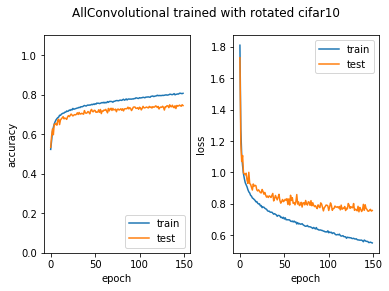

Testing both models on both datasets...


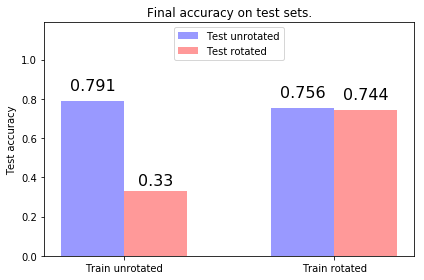

model_rotated_test_dataset score: loss=4.400844, accuracy=0.329600
model_rotated_train_dataset score: loss=4.321411, accuracy=0.330780
model_test_dataset score: loss=0.781335, accuracy=0.790700
model_train_dataset score: loss=0.160163, accuracy=0.948320
rotated_model_rotated_test_dataset score: loss=0.759722, accuracy=0.744300
rotated_model_rotated_train_dataset score: loss=0.539365, accuracy=0.810640
rotated_model_test_dataset score: loss=0.742389, accuracy=0.755700
rotated_model_train_dataset score: loss=0.523590, accuracy=0.815760


In [14]:
import pytorch_experiment
batch_size = 256

epochs={'cifar10':70,'mnist':15,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':15,'mnist_rot':10,'pugeault':15}

rotated_epochs={'cifar10':150,'mnist':50,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':15,'pugeault':40}

config=pytorch_experiment.TrainRotatedConfig(dataset_name=dataset,batch_size=batch_size,
                   epochs=epochs[dataset],rotated_epochs=rotated_epochs[dataset],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)


scores=pytorch_experiment.train_rotated(config,model,rotated_model,
                                        x_train,y_train,x_test,y_test,plot_accuracy=True)


for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))



In [ ]:
from datetime import datetime

output_file="results/allconv.txt"
f= open(output_file,"a+")
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
f.write(general_message)
print(general_message)
for k,v in scores.items():
    message='%s score: loss=%f, accuracy=%f\n' % (k,v[0],v[1])
    print(message)
    f.write(message)
f.write("\n\n")    
f.write("Config: "+str(config))    
f.close()